<a href="https://colab.research.google.com/github/pruce99/LogisticRegressionNeuralNetwork/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
UB person number: 50425014

UB IT Name: paravamu

In [ ]:
#Setting Directory
from google.colab import drive
drive.mount('/content/drive/')

#remove these lines and just upload the dataset


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Attach your drive to access the dataset
%cd drive/MyDrive/Colab\ Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [ ]:
#Getting dataset and storing it in the form of pandas dataframe
#Mention the path with the file name to test the code out 

dataset = pd.read_csv("diabetes.csv",engine='python');
dataset.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#To view count, mean, standard Devitation... of the dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Instead of randomly picking the train, validate and test, we use
#random seed to pick the same train, test and validate 
np.random.seed(72)


In [ ]:
#Splitting the dataset to train - 60%, validate - 20%, test - 20%
train, validate, test = np.split(dataset.sample(frac=1),[int(.6*len(dataset)), int(.8*len(dataset))])

In [ ]:
#Storing the first 8 columns to train_X and saving last column to train_Y
train_X = train.iloc[:, 0:8]
train_y = train.iloc[:, -1]

In [ ]:
#Storing the first 8 columns to test_X and saving last column to test_Y
test_X = test.iloc[:, 0:8]
test_Y = test.iloc[:, -1]

In [ ]:
#Storing the first 8 columns to validation_X and 
#Saving last column to validation_Y
validation_X = validate.iloc[:, 0:8]
validation_y = validate.iloc[:, -1]

In [ ]:
#Visualizing the shape of all the train,test and validation
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_Y.shape)
print(validation_X.shape)
print(validation_y.shape)


(460, 8)
(460,)
(154, 8)
(154,)
(154, 8)
(154,)


In [ ]:
#Scaling the values from 0 to 1, normalazing the train_X, test_X and validation_x
x_min = train_X.min(axis=0)
x_max = train_X.max(axis=0)

test_X_min = test_X.min(axis=0)
test_X_max = test_X.max(axis=0)

validation_X_min = validation_X.min(axis=0)
validation_X_max = validation_X.max(axis=0)

# Centralizing data to range within minimum and maximum
# train_X = (train_X - x_min) / (x_max - x_min)
# test_X = (test_X - test_X_min) / (test_X_max - test_X_min)
# validation_X = (validation_X - validation_X_min) / (validation_X_max - validation_X_min)

# normalizing data to unit std and zero mean - follows normal distribution (z - score normalisation)
train_X = (train_X - train_X.mean()) / train_X.std()
test_X = (test_X - test_X.mean()) / test_X.std()
validation_X = (validation_X - validation_X.mean()) / validation_X.std()

In [ ]:
#Sigmoid function is the hypotheses represenation
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
#Logistic Regression cost function 
def lossFunction(y_true, y_pred,eps=1e-15):
    """
    Cost function is Binary Cross-Entropy (BCE)
    """
    # bce (added eps to avoid nan during log calculation)
    loss = (y_true * np.log(eps + y_pred)) + ((1 - y_true) * np.log(1-(y_pred + eps)))
    return -loss.mean(axis=0)

In [ ]:
def gradients(X, y, y_Pred):
    
    #To get the row size, aka training examples
    m = X.shape[0]
    
    # Gradient of loss with respect to weights.
    dw = np.dot(X.T, (y_Pred - y))/m

    # (1/m) * (X transpose) dot product (sigmoid output - actual y value)
    
    # Gradient of loss w.r.t bias.
    db = np.sum((y_Pred - y))/m
    # (1/m) * (sum of column sigmoid output - y) 
    
    return dw, db


In [ ]:
def accuracy(y, y_Pred):
  """
  Calculates accuracy between target values and predicted values
  """
  threshold=0.5
  return np.sum(y == (y_Pred >= threshold)) / len(y) *100

In [ ]:
def train(x, y, epochs, lr):
    

    m, n = x.shape
    #getting row size and column size

    # Initializing weights and bias to randomized value.
    w = np.random.randn(n,1)
    b = 0
    
    # Reshaping y.
    y = y.values.reshape(m,1)
    
    # Empty list to store losses and accuracy and plotting it 
    losses = []
    accuracyValues = []
    
    for epoch in range(epochs):
      y_Pred = sigmoid(np.dot(x, w) + b)
      dw, db = gradients(x, y, y_Pred)
      w -= lr*dw
      b -= lr*db
      l = lossFunction(y, sigmoid(np.dot(x, w) + b))
      a = accuracy(y,np.round(y_Pred))
      losses.append(l)
      accuracyValues.append(a)


    plt.plot(losses)
    plt.show()
    print("Losses")
    plt.plot(accuracyValues)
    plt.show()
    print("Accuracy")
    return w, b, losses

In [ ]:
def makePrediction(x, w, b):
    
    # Calculating predictions/y_pred.
    preds = sigmoid(np.dot(x, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_pred >= 0.5 --> round up to 1
    # if y_pred < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

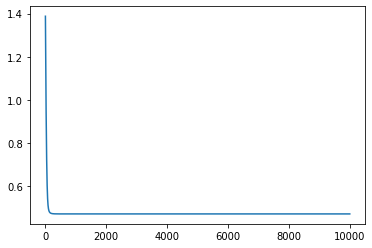

Losses


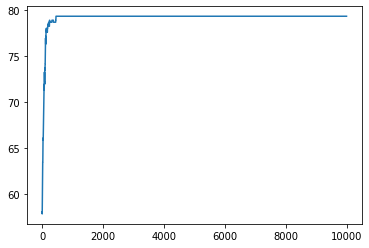

Accuracy


In [ ]:
# Training 
w, b, l = train(train_X, train_y, epochs=10000, lr=0.1)


In [ ]:
print(f"The accuracy of the train set is {accuracy(train_y, y_Pred=makePrediction(train_X, w, b)):.2f}%")

The accuracy of the train set is 79.35%


In [ ]:
print(f"The accuracy of the test set is {accuracy(test_Y, y_Pred=makePrediction(test_X, w, b)):.2f}%")

The accuracy of the test set is 77.92%


In [ ]:
print(f"The accuracy of the validation set is {accuracy(validation_y, y_Pred=makePrediction(validation_X, w, b)):.2f}%")

The accuracy of the validation set is 75.32%


#Using Neural Network


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential, Model

In [ ]:
#Using 1 input layer and 1 output layer and two hidden layers
def get_tf_nn(features):

  #Input layer is nothing but the features itself 
  i = Input((features, ))
  #The relu activation finds Max(0,x)
  #Second layer, Hidden Layer with relu activation
  x = Dense(256, activation='relu')(i)
  #Third Layer, Hidden layer with relu activation 
  x = Dense(512, activation='relu')(x)
  #Output layer with sigmoid activation
  o = Dense(1, activation='sigmoid')(x)

  #Passing the input layer and output layer to Model 
  model = Model(inputs=i, outputs=o)
  #Compiling our model with binary crossentropy 
  #Using Adam optimizer, which is better then SGD optimizer and getting the accuracy metrics
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

  return model

In [ ]:
nn = get_tf_nn(train_X.shape[1])

In [ ]:
print(nn.summary())

Model: "model_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_124 (InputLayer)       [(None, 8)]               0         
_________________________________________________________________
dense_369 (Dense)            (None, 256)               2304      
_________________________________________________________________
dense_370 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_371 (Dense)            (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
h = nn.fit(train_X, train_y, validation_data=(validation_X, validation_y), epochs=15, batch_size=16)

Epoch 1/15
29/29 [==============================] - 1s 8ms/step - loss: 0.6497 - accuracy: 0.6652 - val_loss: 0.6080 - val_accuracy: 0.7403
Epoch 2/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7761 - val_loss: 0.5535 - val_accuracy: 0.7468
Epoch 3/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7761 - val_loss: 0.5239 - val_accuracy: 0.7532
Epoch 4/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.7848 - val_loss: 0.5053 - val_accuracy: 0.7532
Epoch 5/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7804 - val_loss: 0.4963 - val_accuracy: 0.7532
Epoch 6/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.7804 - val_loss: 0.4916 - val_accuracy: 0.7662
Epoch 7/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.7870 - val_loss: 0.4863 - val_accuracy: 0.7662
Epoch 8/15
29/29 [==

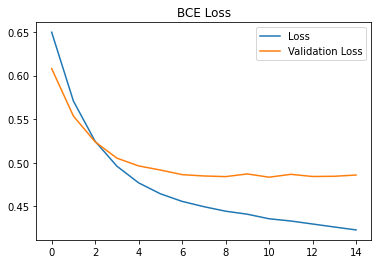

In [ ]:
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('BCE Loss')
plt.legend()
plt.show()

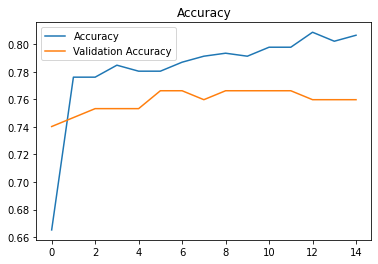

In [ ]:
plt.plot(h.history['accuracy'], label='Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_pred = nn.evaluate(train_X, train_y)
val_pred = nn.evaluate(validation_X, validation_y)
test_pred = nn.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7468


#Using dropout regularizer

In [ ]:
def get_tf_nn(features):
  i = Input((features, ))
  x = Dense(256, activation='relu')(i)
  #Dropout Sets input units to zero while training to reduce overfitting
  x = Dropout(0.4)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.4)(x)
  o = Dense(1, activation='sigmoid')(x)

  #Passing the input layer and output layer to Model 
  model = Model(inputs=i, outputs=o)

  #Compiling our model with binary crossentropy 
  #Using Adam optimizer, which is better then SGD optimizer and getting the accuracy metrics
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

  return model

In [ ]:
nn = get_tf_nn(train_X.shape[1])

In [ ]:
print(nn.summary())

Model: "model_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_128 (InputLayer)       [(None, 8)]               0         
_________________________________________________________________
dense_381 (Dense)            (None, 256)               2304      
_________________________________________________________________
dropout_78 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_382 (Dense)            (None, 512)               131584    
_________________________________________________________________
dropout_79 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_383 (Dense)            (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
___________________________________________________

In [ ]:
h = nn.fit(train_X, train_y, validation_data=(validation_X, validation_y), epochs=15, batch_size=16)

Epoch 1/15
29/29 [==============================] - 1s 10ms/step - loss: 0.6700 - accuracy: 0.6283 - val_loss: 0.6280 - val_accuracy: 0.7338
Epoch 2/15
29/29 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.7022 - val_loss: 0.5861 - val_accuracy: 0.7273
Epoch 3/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7435 - val_loss: 0.5579 - val_accuracy: 0.7208
Epoch 4/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.7522 - val_loss: 0.5361 - val_accuracy: 0.7338
Epoch 5/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7587 - val_loss: 0.5219 - val_accuracy: 0.7597
Epoch 6/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7674 - val_loss: 0.5105 - val_accuracy: 0.7662
Epoch 7/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.7891 - val_loss: 0.5001 - val_accuracy: 0.7662
Epoch 8/15
29/29 [=

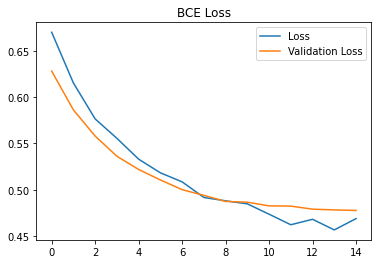

In [ ]:
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('BCE Loss')
plt.legend()
plt.show()

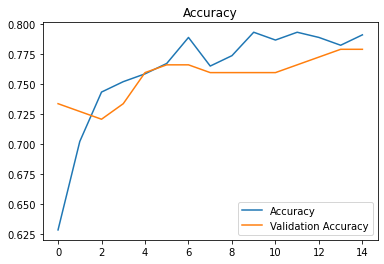

In [ ]:
plt.plot(h.history['accuracy'], label='Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_pred = nn.evaluate(train_X, train_y)
test_pred = nn.evaluate(test_X, test_Y)
val_pred = nn.evaluate(validation_X, validation_y)


5/5 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7792


# Using L1 Regularizer 

In [ ]:
def get_tf_nn(features):
  i = Input((features, ))
  x = Dense(256,kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5), activation='relu')(i)
  x = Dense(512,kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5), activation='relu')(x)
  o = Dense(1,kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5), activation='sigmoid')(x)

  model = Model(inputs=i, outputs=o)
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

  return model

In [ ]:
nn = get_tf_nn(train_X.shape[1])

In [ ]:
print(nn.summary())

Model: "model_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_130 (InputLayer)       [(None, 8)]               0         
_________________________________________________________________
dense_387 (Dense)            (None, 256)               2304      
_________________________________________________________________
dense_388 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_389 (Dense)            (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
h = nn.fit(train_X, train_y, validation_data=(validation_X, validation_y), epochs=15, batch_size=16)

Epoch 1/15
29/29 [==============================] - 1s 10ms/step - loss: 0.7160 - accuracy: 0.6783 - val_loss: 0.6687 - val_accuracy: 0.7338
Epoch 2/15
29/29 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.7739 - val_loss: 0.6206 - val_accuracy: 0.7338
Epoch 3/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7696 - val_loss: 0.5899 - val_accuracy: 0.7403
Epoch 4/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.7783 - val_loss: 0.5679 - val_accuracy: 0.7468
Epoch 5/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.7870 - val_loss: 0.5566 - val_accuracy: 0.7468
Epoch 6/15
29/29 [==============================] - 0s 5ms/step - loss: 0.5255 - accuracy: 0.7870 - val_loss: 0.5499 - val_accuracy: 0.7532
Epoch 7/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5149 - accuracy: 0.7978 - val_loss: 0.5435 - val_accuracy: 0.7532
Epoch 8/15
29/29 [=

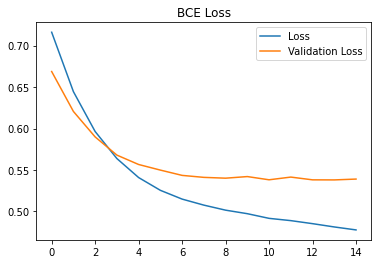

In [ ]:
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('BCE Loss')
plt.legend()
plt.show()

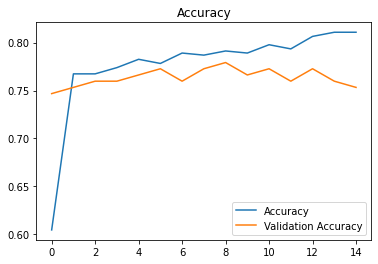

In [ ]:
plt.plot(h.history['accuracy'], label='Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_pred = nn.evaluate(train_X, train_y)
val_pred = nn.evaluate(validation_X, validation_y)
test_pred = nn.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7468


#Using L2 Regularizer

In [ ]:
def get_tf_nn(features):
  i = Input((features, ))
  x = Dense(256,kernel_regularizer=tf.keras.regularizers.L2(l2=1e-5), activation='relu')(i)
  x = Dense(512,kernel_regularizer=tf.keras.regularizers.L2(l2=1e-5), activation='relu')(x)
  o = Dense(1,kernel_regularizer=tf.keras.regularizers.L2(l2=1e-5), activation='sigmoid')(x)

  model = Model(inputs=i, outputs=o)
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

  return model

In [ ]:
nn = get_tf_nn(train_X.shape[1])

In [ ]:
print(nn.summary())

Model: "model_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_141 (InputLayer)       [(None, 8)]               0         
_________________________________________________________________
dense_420 (Dense)            (None, 256)               2304      
_________________________________________________________________
dense_421 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_422 (Dense)            (None, 1)                 513       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
h = nn.fit(train_X, train_y, validation_data=(validation_X, validation_y), epochs=15, batch_size=16)

Epoch 1/15
29/29 [==============================] - 1s 9ms/step - loss: 0.6567 - accuracy: 0.6587 - val_loss: 0.6174 - val_accuracy: 0.6688
Epoch 2/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5864 - accuracy: 0.7326 - val_loss: 0.5689 - val_accuracy: 0.7143
Epoch 3/15
29/29 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.7674 - val_loss: 0.5391 - val_accuracy: 0.7403
Epoch 4/15
29/29 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.7761 - val_loss: 0.5174 - val_accuracy: 0.7662
Epoch 5/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7848 - val_loss: 0.5046 - val_accuracy: 0.7532
Epoch 6/15
29/29 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7870 - val_loss: 0.4963 - val_accuracy: 0.7468
Epoch 7/15
29/29 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7870 - val_loss: 0.4888 - val_accuracy: 0.7532
Epoch 8/15
29/29 [==

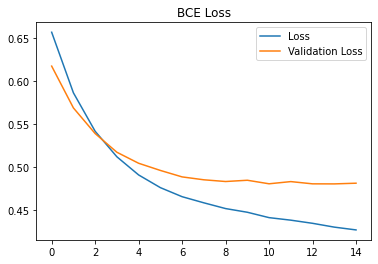

In [ ]:
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('BCE Loss')
plt.legend()
plt.show()

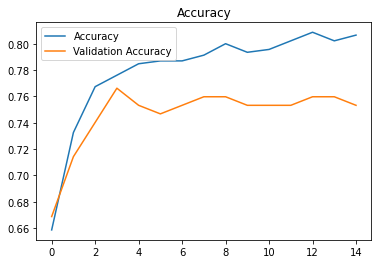

In [ ]:
plt.plot(h.history['accuracy'], label='Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_pred = nn.evaluate(train_X, train_y)
test_pred = nn.evaluate(test_X, test_Y)
val_pred = nn.evaluate(validation_X, validation_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7532
